<a href="https://colab.research.google.com/github/Gilmer007/proyecto/blob/master/Caso_Mi_Vivienda_Colaci%C3%B3n_Creditos_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Aprendizaje Automático para la Predicción de ingresos y obtener un credito Hipotecario del fondo  Mi Vivienda
---
La información publicada corresponde a las colocaciones de los créditos MIVIVIENDA otorgados por el FMV.

En cumplimiento de su objeto social de promoción y financiamiento de la adquisición, mejoramiento y construcción de viviendas, especialmente las de interés social, el FMV ofrece dos productos: El Nuevo Crédito MIVIVIENDA (NCMV), el Financiamiento Complementario Techo Propio (FCTP) y Servicio CRC (S-CRC)

Fuente: [Plataforma Nacional de Datos Abiertos](https://datosabiertos.gob.pe/dataset/colocaciones-de-los-cr%C3%A9ditos-mivivienda) Periodo 2024

Integrantes:

## 1. Análisis Exploratorio de datos
---

### 1.1 Importación de librerias a usar

In [1]:
#repositorio de dataset
!git clone https://github.com/Gilmer007/proyecto.git

Cloning into 'proyecto'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12 (delta 6), reused 12 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 1.45 MiB | 5.77 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### 1.2 Carga de los datos

In [3]:
%%time
datos2018 = pd.read_csv('/content/proyecto/Data_NCMV_2018.csv', sep=",")
datos2019 = pd.read_csv('/content/proyecto/Data_NCMV_2019.csv', sep=",")
datos2020 = pd.read_csv('/content/proyecto/Data_NCMV_2020.csv', sep=",")
datos2021 = pd.read_csv('/content/proyecto/Data_NCMV_2021.csv', sep=",")
datos2022 = pd.read_csv('/content/proyecto/Data_NCMV_2022.csv', sep=",")
datos2023 = pd.read_csv('/content/proyecto/Data_NCMV_2023.csv', sep=";")
datos2024 = pd.read_csv('/content/proyecto/Data_NCMV_2024.csv', sep=";")
print(datos2018.shape)
print(datos2019.shape)
print(datos2020.shape)
print(datos2021.shape)
print(datos2022.shape)
print(datos2023.shape)
print(datos2024.shape)

(9144, 14)
(12224, 14)
(8362, 14)
(12871, 14)
(13507, 14)
(13507, 14)
(13507, 14)
CPU times: user 213 ms, sys: 56.1 ms, total: 269 ms
Wall time: 899 ms


In [4]:
datos = pd.concat([datos2018,datos2019,datos2020,datos2021,datos2022,datos2023,datos2024], ignore_index=True)
datos.shape

(83122, 14)

In [5]:
# Información del dataset cargado
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83122 entries, 0 to 83121
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FECHA_DESEMBOLSO      76936 non-null  float64
 1   PRODUCTO              76936 non-null  object 
 2   DEPARTAMENTO          76936 non-null  object 
 3   PROVINCIA             76936 non-null  object 
 4   DISTRITO              76936 non-null  object 
 5   UBIGEO                76936 non-null  float64
 6   IFI                   76936 non-null  object 
 7   TIPO_IFI              76936 non-null  object 
 8   MONTO_CREDITO         76936 non-null  float64
 9   MONTO_CUOTA_INICIAL   76936 non-null  float64
 10  PLAZOS                76936 non-null  float64
 11  TASA                  76936 non-null  float64
 12  MONTO_VALOR_VIVIENDA  76936 non-null  float64
 13  FECHA_CORTE           76936 non-null  float64
dtypes: float64(8), object(6)
memory usage: 8.9+ MB


In [6]:
# Analizamos las dimensiones del dataset, vemos que hay registro vacios en el dataset
datos.shape

(83122, 14)

In [7]:
#Analizamos los datos vacios para saber en que variables se encuentram, observamos que estan en todos.
datos.isnull().sum()

,0
FECHA_DESEMBOLSO,6186
PRODUCTO,6186
DEPARTAMENTO,6186
PROVINCIA,6186
DISTRITO,6186
UBIGEO,6186
IFI,6186
TIPO_IFI,6186
MONTO_CREDITO,6186
MONTO_CUOTA_INICIAL,6186


In [8]:
# Procedemos a eliminar estos datos que contengan NaN en cualquier columna en el mismo dataset
datos.dropna(inplace=True)

In [9]:
datos.FECHA_CORTE = pd.to_datetime(datos.FECHA_CORTE, format='%Y%m%d')
datos.FECHA_DESEMBOLSO = pd.to_datetime(datos.FECHA_DESEMBOLSO, format='%Y%m%d')

In [10]:
# Veamos una muestra de los datos
datos.head(7)

,FECHA_DESEMBOLSO,PRODUCTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2018-01-04,FCTP,ICA,ICA,LA TINGUINIA,110102.0,FINANCIERA TFC,FINANCIERA,29800.00,6800.00,120.0,14.5,68000.0,2023-08-11
1,2018-01-04,NCMV,PIURA,MORROPON,CHULUCANAS,200401.0,FINANCIERA TFC,FINANCIERA,42500.00,6500.00,120.0,13.5,65000.0,2023-08-11
2,2018-01-05,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115.0,CMAC SULLANA,CMAC,37350.00,7750.00,96.0,14.0,77500.0,2023-08-11
3,2018-01-05,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115.0,CMAC SULLANA,CMAC,32450.00,14150.00,96.0,14.0,79000.0,2023-08-11
4,2018-01-05,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115.0,CMAC SULLANA,CMAC,37650.01,8949.99,180.0,14.0,79000.0,2023-08-11
5,2018-01-05,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115.0,CMAC SULLANA,CMAC,38000.01,8599.99,180.0,14.0,79000.0,2023-08-11
6,2018-01-05,FCTP,ANCASH,SANTA,NUEVO CHIMBOTE,21801.0,FINANCIERA TFC,FINANCIERA,37470.00,2130.00,144.0,14.5,71000.0,2023-08-11


### 1.3 Información de las columnas

* FECHA_DESEMBOLSO: Es la fecha en la que se ejecuta el desembolso del crédito
* PRODUCTO: Nuevo Crédito MIVIVIENDA (NCMV), Mi Terreno (MT), Financiamiento Complementario Techo Propio (FCTP) y Servicio CRC (S-CRC) 1/
* DEPARTAMENTO: Nombre del departamento
* PROVINCIA: Nombre de la provincia
* DISTRITO: Nombre del distrito
* UBIGEO: Codificación de la ubicación geográfica donde se encuentra ubicada la vivienda. Está conformada por 6 dígitos, siendo su estructura, recorriendo el valor de izquierda a derecha, la siguiente:
  * 1er y 2do dígito identifican el departamento (02)
  * 3er y 4to dígito identifican la provincia (02)
  * 5to y 6to dígito identifican el distrito (02)
* IFI: Institución Financiera Intermediaria, que opera bajo el ámbito de supervisión de la SBS y es considerada como apta por el FMV para el otorgamiento de los créditos MIVIVIENDA.
* TIPO_IFI: Las IFI se dividen en siete tipos: Banca Múltiple (Banco), Financiera, Cooperativa de Ahorro y Crédito (CAC), Caja Municipal de Ahorro y Crédito (CMAC), Caja Rural de Ahorro y Crédito (CRAC), Empresa de Créditos (Edpyme) y Empresas Administradoras Hipotecarias (Hipotecaria)
* MONTO_CREDITO: Monto del crédito colocado
* MONTO_CUOTA_INICIAL: Monto de la cuota inicial
* PLAZOS: Es el número de meses del crédito
* TASA: Tasa de interés del crédito
* MONTO_VALOR_VIVIENDA: Monto del valor de la vivienda.
* FECHA_CORTE: Fecha de corte de información.

In [11]:
# ¿Que columnas tienen los datos?
datos.columns

Index(['FECHA_DESEMBOLSO', 'PRODUCTO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'UBIGEO', 'IFI', 'TIPO_IFI', 'MONTO_CREDITO', 'MONTO_CUOTA_INICIAL',
       'PLAZOS', 'TASA', 'MONTO_VALOR_VIVIENDA', 'FECHA_CORTE'],
      dtype='object')

In [12]:
# ¿Que cantidad de columnas tienen los datos?
datos.columns.size

14

In [13]:
# Analizamos los datos unicos en las variables
datos.nunique()

,0
FECHA_DESEMBOLSO,1319
PRODUCTO,5
DEPARTAMENTO,25
PROVINCIA,97
DISTRITO,348
UBIGEO,367
IFI,38
TIPO_IFI,9
MONTO_CREDITO,41209
MONTO_CUOTA_INICIAL,25576


In [14]:
# ¿Como se distribuyen las variables númericas?
datos.describe()

,FECHA_DESEMBOLSO,UBIGEO,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
count,76936,76936.000000,76936.000000,76936.000000,76936.000000,76936.000000,76936.000000,76936
mean,2021-08-06 04:22:33.602994688,142057.131122,154046.457139,32770.004713,202.965335,9.818292,205066.663951,2023-12-28 16:34:41.314339328
min,2018-01-04 00:00:00,10101.000000,4000.000000,0.000000,0.000000,5.000000,42500.000000,2023-08-11 00:00:00
25%,2019-11-07 00:00:00,140101.000000,82100.000000,16000.000000,168.000000,8.450000,127103.435000,2023-08-11 00:00:00
50%,2021-10-13 00:00:00,150110.000000,134500.000000,27090.725000,240.000000,9.210000,186579.115000,2023-08-11 00:00:00
75%,2023-02-27 00:00:00,150128.000000,219306.450000,42592.462500,240.000000,10.320000,276202.500000,2025-01-08 00:00:00
max,2024-12-30 00:00:00,250302.000000,431370.000000,334420.380000,300.000000,25.000000,479300.000000,2025-01-08 00:00:00
std,NaN,35724.699120,91125.856232,24376.629711,61.580019,2.219365,97607.676034,NaN


In [15]:
# ¿Como se comportan las variables categoricas?
datos.describe(include="O")

,PRODUCTO,DEPARTAMENTO,PROVINCIA,DISTRITO,IFI,TIPO_IFI
count,76936,76936,76936,76936,76936,76936
unique,5,25,97,348,38,9
top,NCMV,LIMA,LIMA,COMAS,CREDITO,BANCO
freq,49520,43626,42979,10606,18476,39386


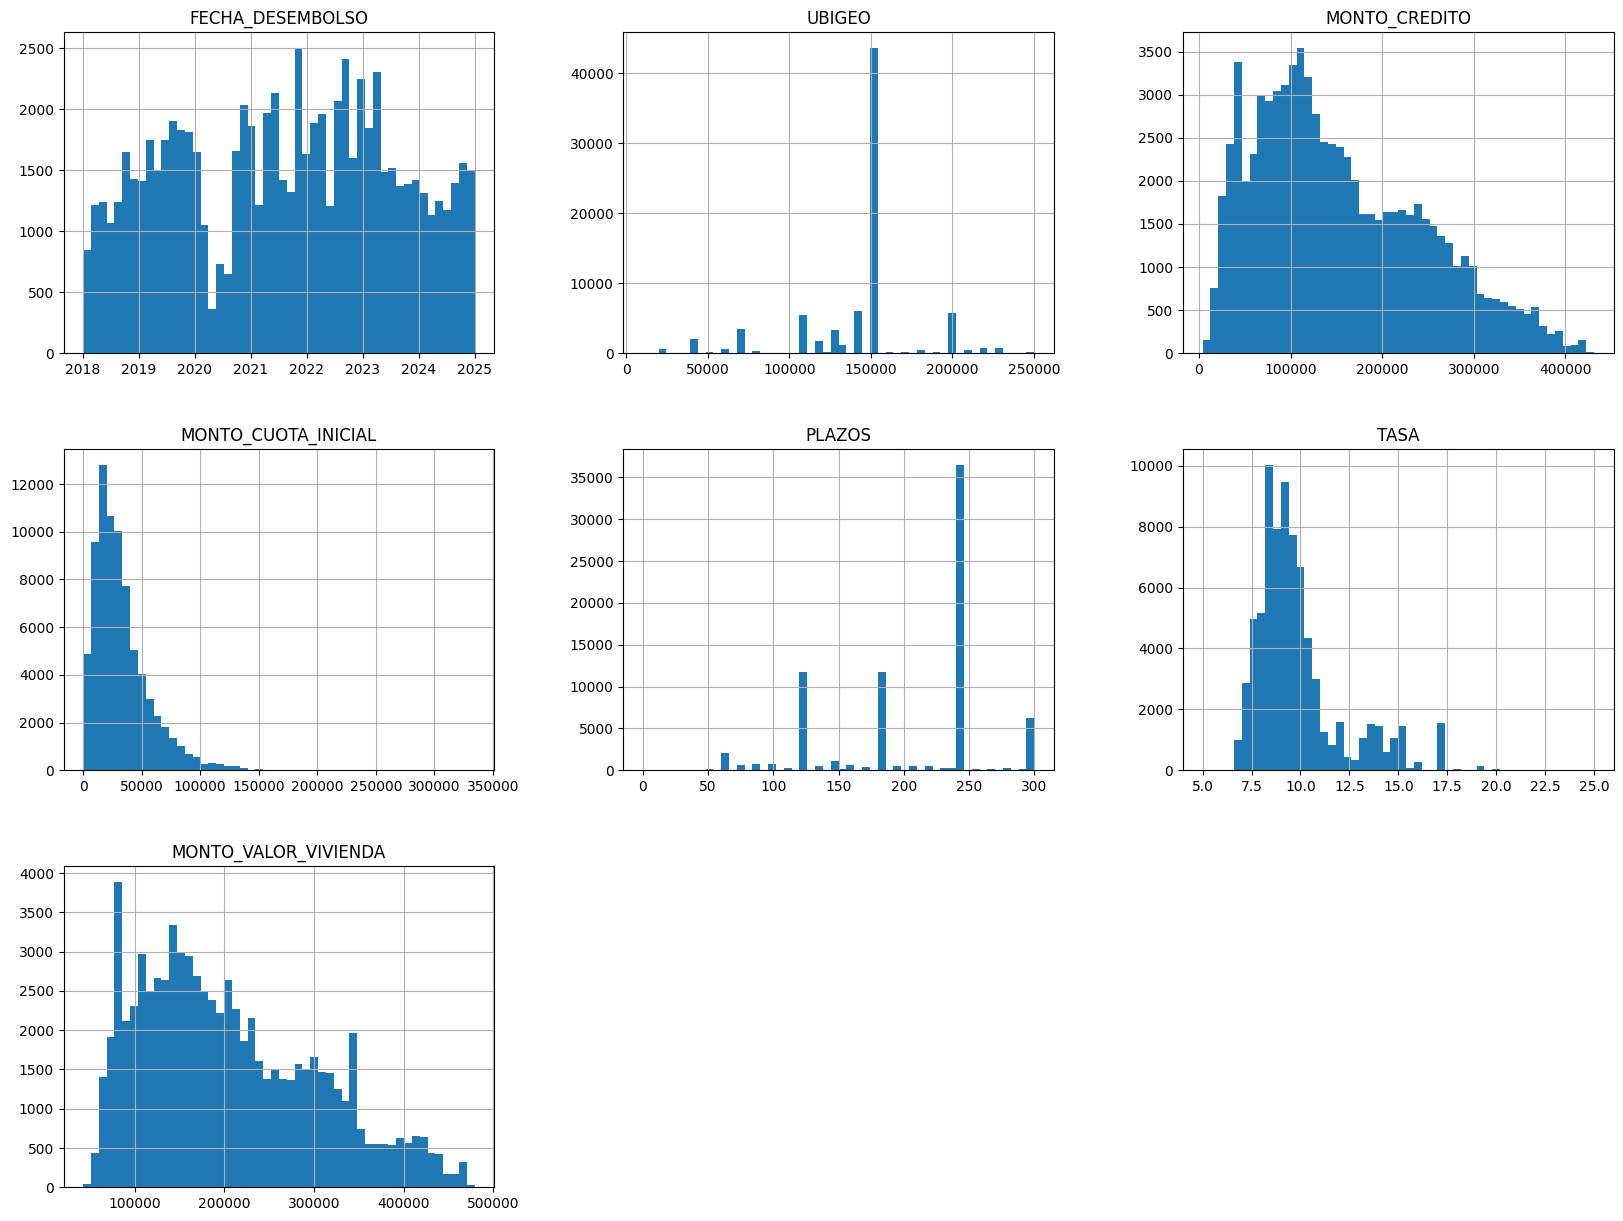

In [16]:
# graficar histograma de las variables numericas
datos.drop(['FECHA_CORTE'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
#se realiza el match con los datos de ubigeo de Peru para la vizualizacion en mapa
ubigeos=pd.read_csv('/content/proyecto/UBIGEOS.csv',sep=';',encoding='latin1')


In [18]:
#realizamos el cambio de nombre de las columnas data8
ubigeos.rename(columns={'ubigeo_inei':'UBIGEO'}, inplace=True)

In [19]:
#se crea un nuevo dataframe para la grafica de Peru
datos_mapa=pd.merge(datos, ubigeos, on='UBIGEO', how='left')

In [20]:
#borramos los datos nulos
datos_mapa.isnull().sum()
datos_mapa.dropna(inplace=True)


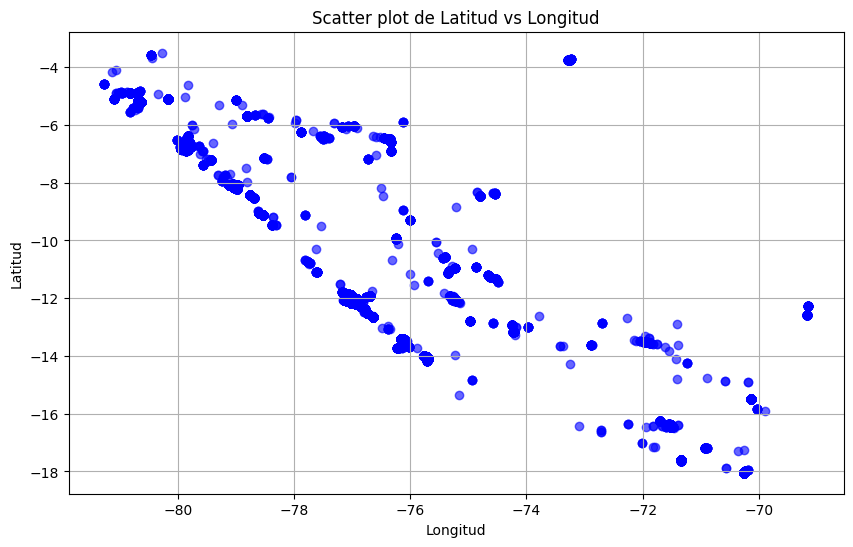

In [21]:
#se grafica los datos Peru
# Crear un gráfico de dispersión de latitud vs longitud
plt.figure(figsize=(10, 6))
plt.scatter(datos_mapa['longitud'], datos_mapa['latitud'], color='blue', alpha=0.6)

# Añadir etiquetas y título
plt.title('Scatter plot de Latitud vs Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [22]:
# se grafica mapa interactivo
import folium
from folium.plugins import HeatMap
import pandas as pd
mapa1 = folium.Map(location=[-9.19, -75.0152], zoom_start=5)

# Crear una lista de ubicaciones para el mapa de calor
ubicaciones = datos_mapa[['latitud', 'longitud']].values.tolist()

# Agregar el mapa de calor
HeatMap(ubicaciones).add_to(mapa1)
mapa1

### 1.4 Procesamiento de los datos

In [23]:
# Analizando los datos, tomamos la deción que las variables fecha de desembolso,
# fecha de corte, ubigeo, departamento, provincia, distrito, ifi, tipo_ifi no son de valor para el análisis
# procedemos a eliminar
df = datos.loc[:,["MONTO_CREDITO","MONTO_VALOR_VIVIENDA","PLAZOS","PRODUCTO","TASA","MONTO_CUOTA_INICIAL"]].reset_index(drop=True)

In [24]:
df.head()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,PRODUCTO,TASA,MONTO_CUOTA_INICIAL
0,29800.00,68000.0,120.0,FCTP,14.5,6800.00
1,42500.00,65000.0,120.0,NCMV,13.5,6500.00
2,37350.00,77500.0,96.0,FCTP,14.0,7750.00
3,32450.00,79000.0,96.0,FCTP,14.0,14150.00
4,37650.01,79000.0,180.0,FCTP,14.0,8949.99


In [25]:
df.drop(['PRODUCTO'],axis=1).corr()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,TASA,MONTO_CUOTA_INICIAL
MONTO_CREDITO,1.000000,0.978222,0.482029,-0.546953,0.485788
MONTO_VALOR_VIVIENDA,0.978222,1.000000,0.446105,-0.534123,0.649091
PLAZOS,0.482029,0.446105,1.000000,-0.462561,0.129717
TASA,-0.546953,-0.534123,-0.462561,1.000000,-0.310424
MONTO_CUOTA_INICIAL,0.485788,0.649091,0.129717,-0.310424,1.000000


In [26]:
# verificacion de los productos
df.PRODUCTO.unique()

array(['FCTP', 'NCMV', 'MT        ', 'NMIV', 'S-CRC'], dtype=object)

In [27]:
#Se realiza tratamiento de un valor con espacios
column_name = 'PRODUCTO'
# Reemplaza "MT         " por "MT" solo en la columna especificada
df[column_name] = df[column_name].replace(r'MT        ', 'MT', regex=True)
df['PRODUCTO'].value_counts()

,count
PRODUCTO,
NCMV,49520
NMIV,19276
FCTP,7745
S-CRC,393
MT,2


In [28]:
df_trans = pd.get_dummies(df, columns=['PRODUCTO'], dtype=int)
df_trans.head()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,TASA,MONTO_CUOTA_INICIAL,PRODUCTO_FCTP,PRODUCTO_MT,PRODUCTO_NCMV,PRODUCTO_NMIV,PRODUCTO_S-CRC
0,29800.00,68000.0,120.0,14.5,6800.00,1,0,0,0,0
1,42500.00,65000.0,120.0,13.5,6500.00,0,0,1,0,0
2,37350.00,77500.0,96.0,14.0,7750.00,1,0,0,0,0
3,32450.00,79000.0,96.0,14.0,14150.00,1,0,0,0,0
4,37650.01,79000.0,180.0,14.0,8949.99,1,0,0,0,0


In [29]:
df_trans.shape

(76936, 10)

In [30]:
df_trans.nunique()


,0
MONTO_CREDITO,41209
MONTO_VALOR_VIVIENDA,22039
PLAZOS,221
TASA,713
MONTO_CUOTA_INICIAL,25576
PRODUCTO_FCTP,2
PRODUCTO_MT,2
PRODUCTO_NCMV,2
PRODUCTO_NMIV,2
PRODUCTO_S-CRC,2


### 1.5 Analizando las variables de forma gráfica

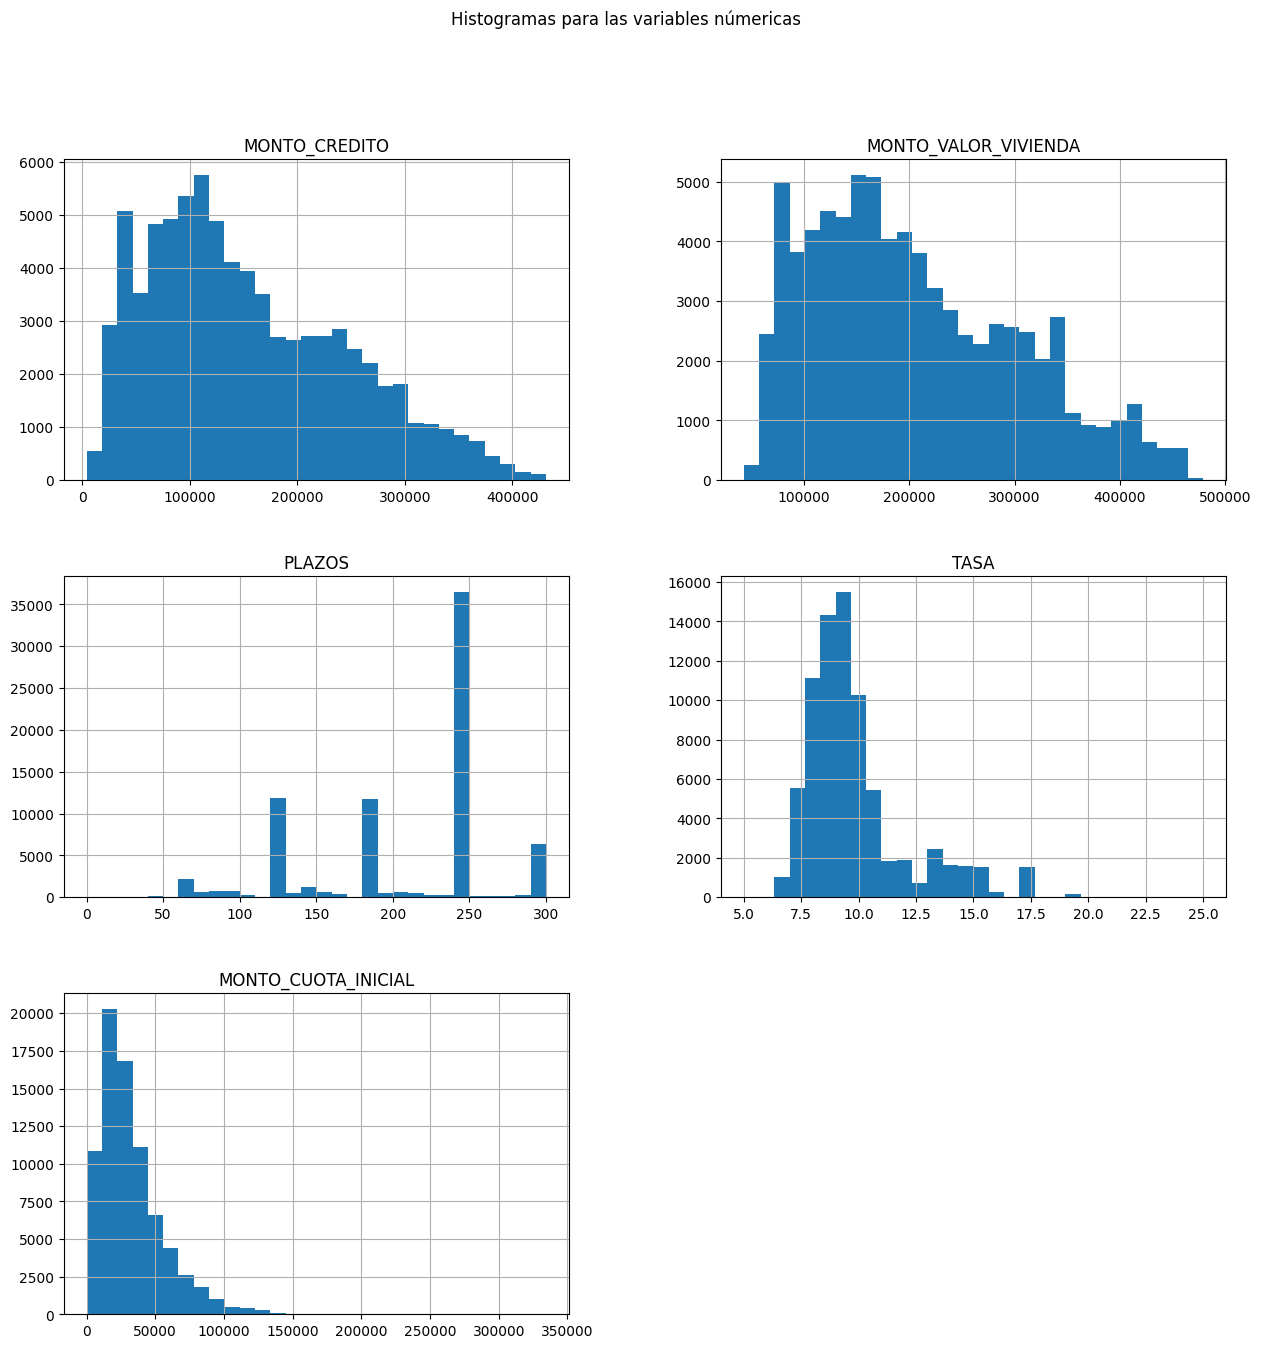

In [31]:
df.drop(['PRODUCTO'],axis=1).hist(bins=30, figsize=(15,15))
plt.suptitle("Histogramas para las variables númericas")
plt.show()

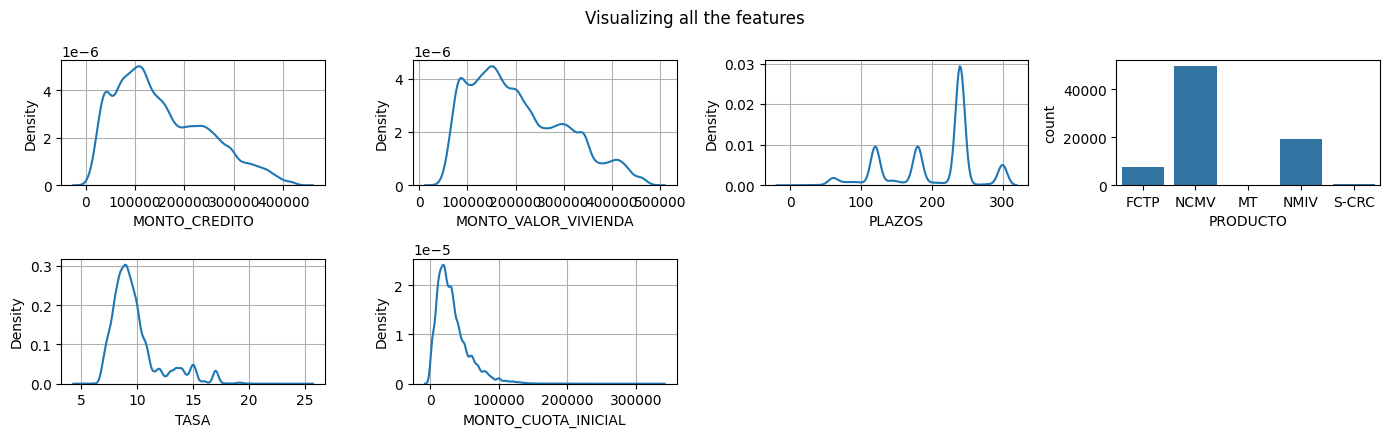

In [32]:
plt.rcParams['figure.figsize']=[14,6]
r=3
c=4
it=1
for i in df.columns:
    plt.suptitle("Visualizing all the features")
    plt.subplot(r,c,it)
    if df[i].dtypes=='object':
        sb.countplot(x=df[i])
    else:
        sb.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='TASA', ylabel='PLAZOS'>

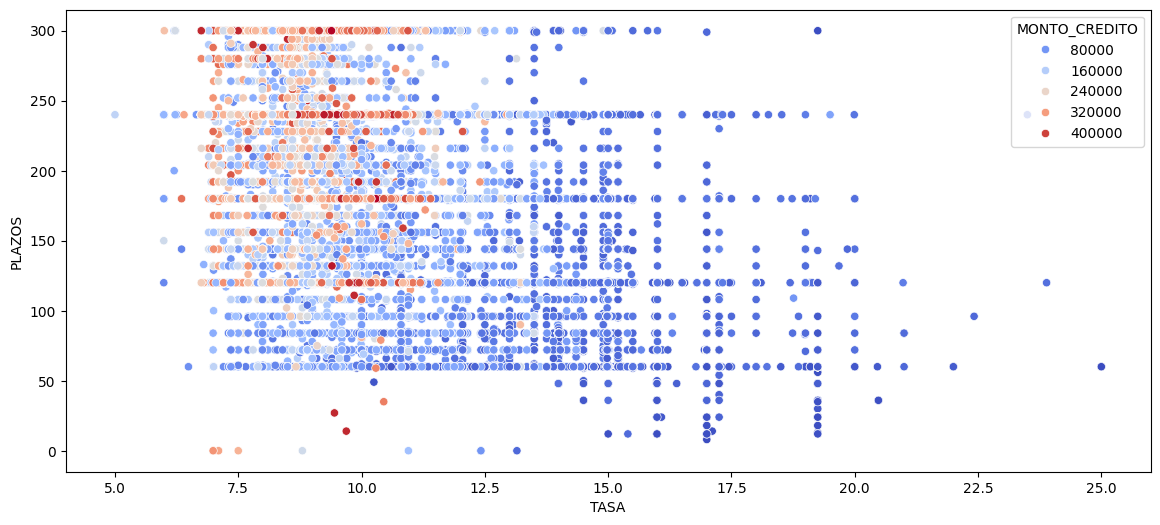

In [33]:
sb.scatterplot(x="TASA",y="PLAZOS", data=df, hue="MONTO_CREDITO", palette="coolwarm")

<Axes: xlabel='MONTO_VALOR_VIVIENDA', ylabel='TASA'>

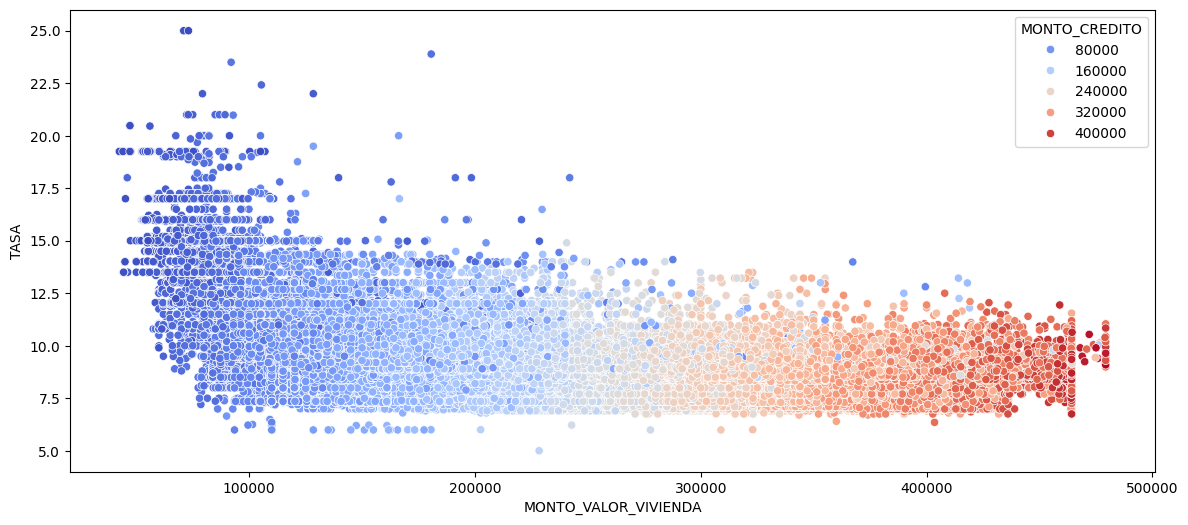

In [34]:
sb.scatterplot(x="MONTO_VALOR_VIVIENDA",y="TASA", data=df, hue="MONTO_CREDITO", palette="coolwarm")

## 2. Aplicación de Cluster K-Means
---

### 2.1 Aplicando el modelo K-Means

In [35]:
#importar libreria kmeans
from sklearn.cluster import KMeans

In [36]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76936 entries, 0 to 76935
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MONTO_CREDITO         76936 non-null  float64
 1   MONTO_VALOR_VIVIENDA  76936 non-null  float64
 2   PLAZOS                76936 non-null  float64
 3   TASA                  76936 non-null  float64
 4   MONTO_CUOTA_INICIAL   76936 non-null  float64
 5   PRODUCTO_FCTP         76936 non-null  int64  
 6   PRODUCTO_MT           76936 non-null  int64  
 7   PRODUCTO_NCMV         76936 non-null  int64  
 8   PRODUCTO_NMIV         76936 non-null  int64  
 9   PRODUCTO_S-CRC        76936 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 5.9 MB


In [37]:
# Seleccionado variables para la clusterizacion
X = df_trans

In [38]:
# Asignamos el modelo e iniciamos con 5 clusters
modelo = KMeans(n_clusters=5)

In [39]:
# Realizamos las predicciones
predicciones = modelo.fit_predict(X)

In [40]:
# Obtenemos los segmentos creados
X["segmento_economico"] = predicciones

In [41]:
# Contamos los segmentos
X["segmento_economico"].value_counts()

,count
segmento_economico,
4,21777
3,17854
1,16200
0,14643
2,6462


In [42]:
X.head()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,TASA,MONTO_CUOTA_INICIAL,PRODUCTO_FCTP,PRODUCTO_MT,PRODUCTO_NCMV,PRODUCTO_NMIV,PRODUCTO_S-CRC,segmento_economico
0,29800.00,68000.0,120.0,14.5,6800.00,1,0,0,0,0,3
1,42500.00,65000.0,120.0,13.5,6500.00,0,0,1,0,0,3
2,37350.00,77500.0,96.0,14.0,7750.00,1,0,0,0,0,3
3,32450.00,79000.0,96.0,14.0,14150.00,1,0,0,0,0,3
4,37650.01,79000.0,180.0,14.0,8949.99,1,0,0,0,0,3


<Axes: xlabel='TASA', ylabel='MONTO_VALOR_VIVIENDA'>

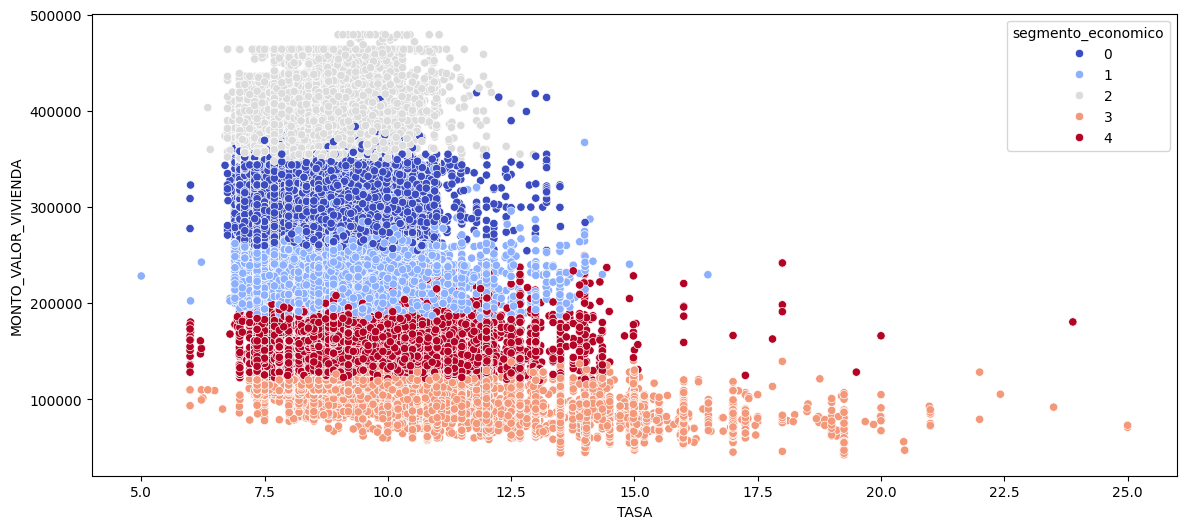

In [43]:
sb.scatterplot(x="TASA",y="MONTO_VALOR_VIVIENDA", data=X, hue="segmento_economico", palette="coolwarm")

<Axes: xlabel='segmento_economico', ylabel='count'>

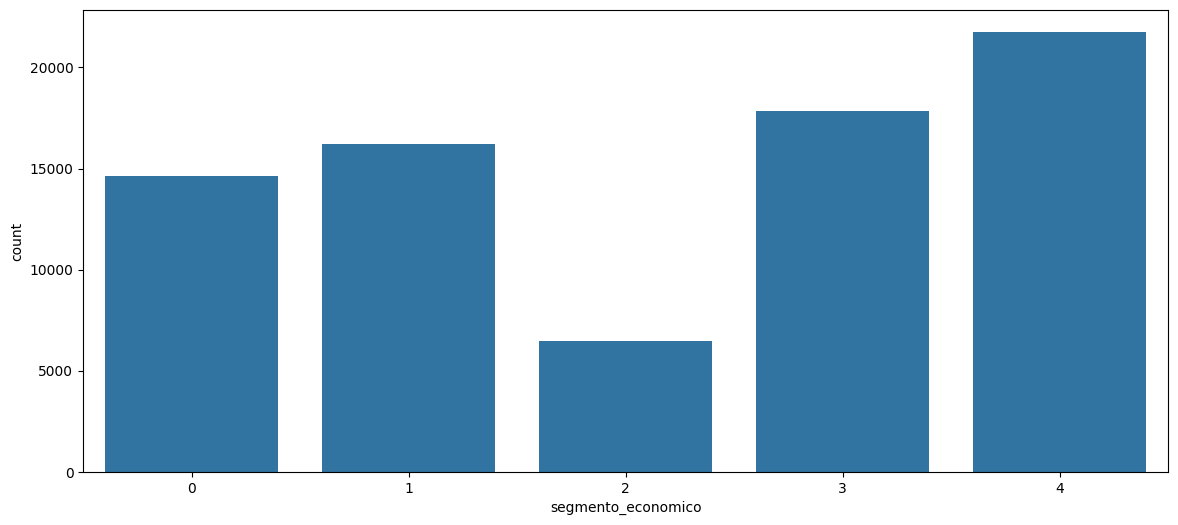

In [44]:
sb.countplot(x="segmento_economico", data=X)

In [45]:
X.groupby("segmento_economico")["MONTO_CREDITO"].mean()

,MONTO_CREDITO
segmento_economico,
0,249132.766976
1,170349.456786
2,339612.306961
3,50961.090594
4,107433.157949


### 2.2 Métricas para evaluar el cluster

In [46]:
# Importando librerias
from sklearn.metrics import silhouette_score

In [47]:
# Evaluando el score del modelo
score = silhouette_score(X,modelo.labels_)
score

0.4660651573300443

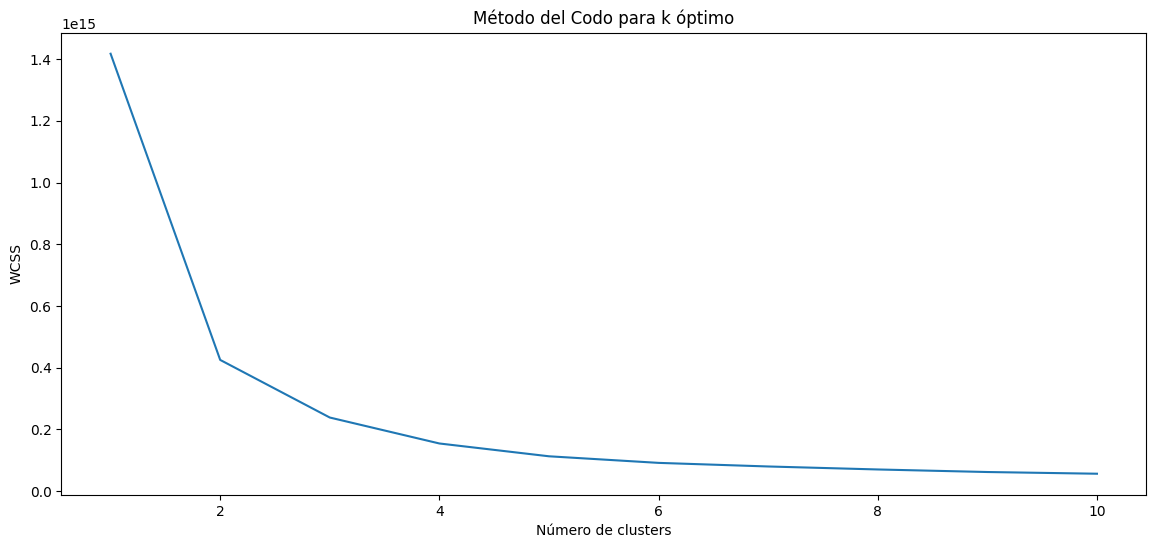

In [48]:
# Aplicar el método del codo para encontrar el número óptimo de clusters
#X = datos.loc[:,["TASA","PLAZOS","MONTO_VALOR_VIVIENDA","MONTO_CREDITO"]]
wcss = []  # Suma de los cuadrados dentro del cluster

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar los resultados
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo para k óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Concluimos que según el Método del Codo, el número de cluster más óptimos está entre 3 y 4

### 2.3 Aplicando el mejor número de clustering

In [49]:
modelo2 = KMeans(n_clusters=2)
predicciones2 = modelo2.fit_predict(X)
X["segmento_economico_2"] = predicciones2
X["segmento_economico_2"].value_counts()

,count
segmento_economico_2,
0,49807
1,27129


In [50]:
score2 = silhouette_score(X, modelo2.labels_)
score2

0.6018853138791233

In [51]:
X.head()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,TASA,MONTO_CUOTA_INICIAL,PRODUCTO_FCTP,PRODUCTO_MT,PRODUCTO_NCMV,PRODUCTO_NMIV,PRODUCTO_S-CRC,segmento_economico,segmento_economico_2
0,29800.00,68000.0,120.0,14.5,6800.00,1,0,0,0,0,3,0
1,42500.00,65000.0,120.0,13.5,6500.00,0,0,1,0,0,3,0
2,37350.00,77500.0,96.0,14.0,7750.00,1,0,0,0,0,3,0
3,32450.00,79000.0,96.0,14.0,14150.00,1,0,0,0,0,3,0
4,37650.01,79000.0,180.0,14.0,8949.99,1,0,0,0,0,3,0


<Axes: xlabel='TASA', ylabel='MONTO_VALOR_VIVIENDA'>

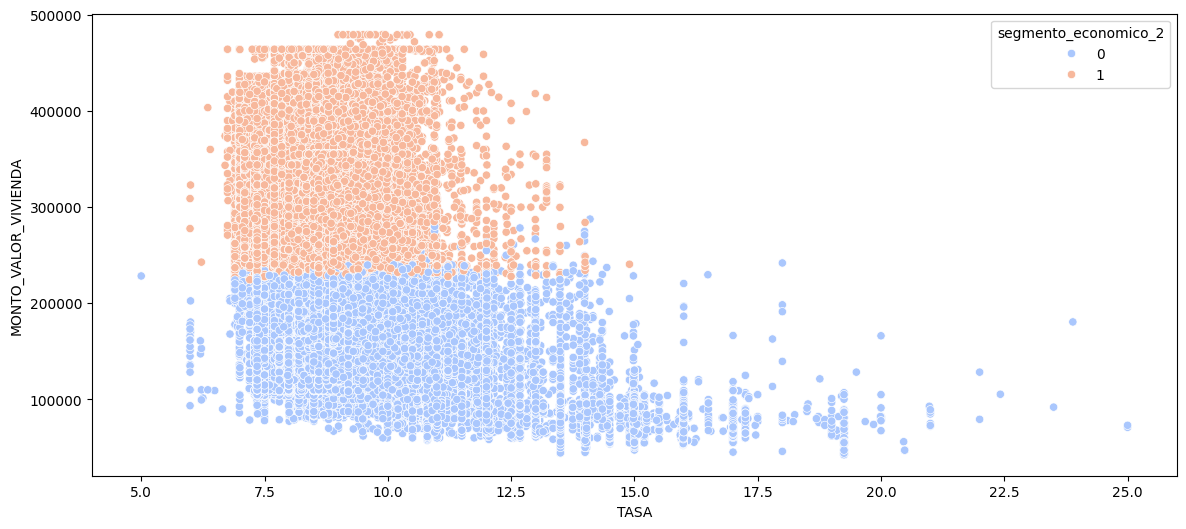

In [52]:
sb.scatterplot(x="TASA",y="MONTO_VALOR_VIVIENDA", data=X, hue="segmento_economico_2", palette="coolwarm")

<Axes: xlabel='segmento_economico_2', ylabel='count'>

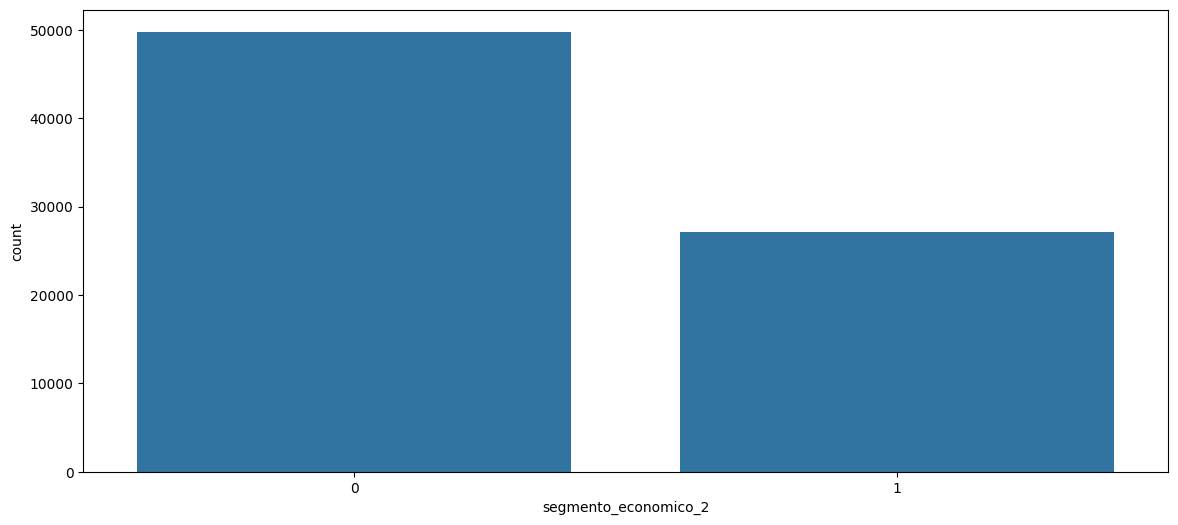

In [53]:
sb.countplot(x="segmento_economico_2", data=X)

In [54]:
X.groupby("segmento_economico_2")["MONTO_CREDITO"].mean()

,MONTO_CREDITO
segmento_economico_2,
0,97202.177804
1,258408.690206


### 2.4 Generando el nuevo dataset con las prediccion

In [55]:
df['segmento_economico_2'] = modelo2.labels_
df.head()

,MONTO_CREDITO,MONTO_VALOR_VIVIENDA,PLAZOS,PRODUCTO,TASA,MONTO_CUOTA_INICIAL,segmento_economico_2
0,29800.00,68000.0,120.0,FCTP,14.5,6800.00,0
1,42500.00,65000.0,120.0,NCMV,13.5,6500.00,0
2,37350.00,77500.0,96.0,FCTP,14.0,7750.00,0
3,32450.00,79000.0,96.0,FCTP,14.0,14150.00,0
4,37650.01,79000.0,180.0,FCTP,14.0,8949.99,0


In [56]:
# Exportarmos la data a un nuevo archivo
df.to_csv('MiVivienda_Ready1.csv', index=False)